# Exercise 3

In this exercise, you will analyse a dataset obtained from the London transport system (TfL). The data is in a filled called `tfl_readership.csv` (comma-separated-values format).  As in Exercise 2, we will load and view the data using  `pandas`. 

In [129]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [130]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [131]:
# Load data
df_tfl = pd.read_csv('tfl_ridership.csv')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/tfl_ridership.csv'

df_tfl.head(13)

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
0,2000/01,P 01,01 Apr '00,29 Apr '00,29d,884,0,0,210,231,...,0,655,1066,200,2509,0,0,96,45.8,0.0
1,2000/01,P 02,30 Apr '00,27 May '00,28d,949,0,0,214,205,...,0,605,1168,217,2598,0,0,93,46.5,0.0
2,2000/01,P 03,28 May '00,24 Jun '00,28d,945,0,0,209,221,...,0,650,1154,212,2623,0,0,98,47.1,0.0
3,2000/01,P 04,25 Jun '00,22 Jul '00,28d,981,0,0,216,241,...,0,708,1196,214,2761,0,0,105,50.8,0.0
4,2000/01,P 05,23 Jul '00,19 Aug '00,28d,958,0,0,225,248,...,0,730,1165,165,2643,0,0,103,50.3,0.0
5,2000/01,P 06,20 Aug '00,16 Sep '00,28d,984,0,0,243,236,...,0,702,1164,151,2608,0,0,100,49.2,0.0
6,2000/01,P 07,17 Sep '00,14 Oct '00,28d,1001,0,0,205,216,...,0,639,1286,196,2763,0,0,107,48.8,0.0
7,2000/01,P 08,15 Oct '00,11 Nov '00,28d,979,0,0,199,221,...,0,668,1298,220,2819,0,0,113,51.5,0.0
8,2000/01,P 09,12 Nov '00,09 Dec '00,28d,971,0,0,184,212,...,0,640,1302,242,2839,0,0,114,54.0,0.0
9,2000/01,P 10,10 Dec '00,06 Jan '01,28d,912,0,0,192,211,...,0,631,993,195,2359,0,0,90,55.3,0.0


Each row of our data frame represents the average daily ridership over a 28/29 day period for various types of transport and tickets (bus, tube etc.).  We have used the `.head()` command to display the top 13 rows of the data frame (corresponding to one year).  Focusing on the "Tube Total" column, notice the dip in ridership in row 9 (presumably due to Christmas/New Year's), and also the slight dip during the summer (rows 4,5).

In [132]:
#df_tfl.sample(3)  #random sample of 3 rows
df_tfl.tail(3)  #last 3 rows

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
242,2018/19,P 09,11 Nov '18,08 Dec '18,28d,0,1110,1089,0,41,...,1399,249,1017,334,4221,996,557,355,84.1,2.6
243,2018/19,P 10,09 Dec '18,05 Jan '19,28d,0,1001,949,0,38,...,1110,242,632,259,3279,750,414,270,66.3,3.2
244,2018/19,P 11,06 Jan '19,02 Feb '19,28d,0,1036,1075,0,30,...,1310,204,924,305,3809,929,517,333,79.3,2.3


The dataframe contains $N=245$ counting periods (of 28/29 days each) from 1 April 2000 to  2 Feb 2019. We now define a numpy array consisting of the values in the ' Tube Total (000s)' column:

In [133]:
yvals = np.array(df_tfl['Tube Total (000s)'])
N = np.size(yvals)
xvals = np.linspace(1,N,N) #an array containing the values 1,2....,N

We now have a time series consisting of points $(x_i,y_i)$, for $i = 1, \ldots, N$, where $y_i$ is the average daily tube rideship in counting period $x_i = i$.

## 3a) Plot the data in a scatterplot

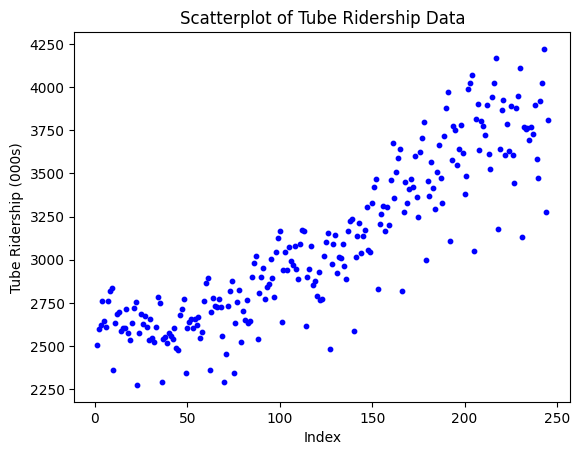

In [134]:
#Your code for scatterplot here
plt.scatter(xvals, yvals, color='blue', s=10)
plt.title('Scatterplot of Tube Ridership Data')
plt.xlabel('Index')
plt.ylabel('Tube Ridership (000s)')
plt.show()




## 3b) Fit a linear model $f(x) = \beta_0 + \beta_1 x$ to the data

- Print the values of the regression coefficients $\beta_0, \beta_1$ determined using least-squares. 
- Plot the fitted model and the scatterplot on the same plot.
- Compute and print the **MSE** and the $R^2$ coefficient for the fitted model.

All numerical outputs should be displayed to three decimal places.

Degree: 1, MSE: 45323.636, R^2: 0.796


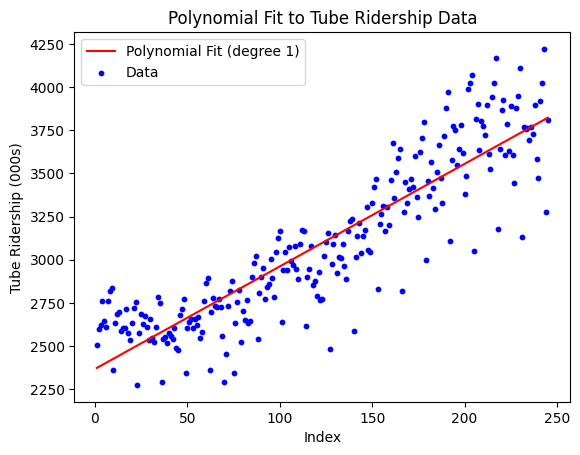

In [135]:
#Your code here
def polyfit(x, y, deg):
    X = []
    for d in range(deg + 1):
        X.append(x ** d)
    X = np.array(X).T
    coeffs = np.linalg.lstsq(X, y, rcond=None)[0]
    fit = np.dot(X, coeffs)
    resid = y - fit
    MSE = np.round(np.mean((y - fit) ** 2), decimals = 3)
    R_squared = np.round(1 - (np.sum((y - fit) ** 2) / np.sum((y - np.mean(y)) ** 2)), decimals=3)
    print(f"Degree: {deg}, MSE: {MSE}, R^2: {R_squared}")
    plt.plot(x, fit, color='red', label=f'Polynomial Fit (degree {deg})')
    plt.scatter(x, y, color='blue', s=10, label='Data')
    plt.title('Polynomial Fit to Tube Ridership Data')
    plt.xlabel('Index')
    plt.ylabel('Tube Ridership (000s)')
    plt.legend()
    plt.show()
    return coeffs,fit,resid, MSE, R_squared

fitted = polyfit(xvals, yvals, 1)  # Linear fit


## 3c)  Plotting the residuals

- Plot the residuals on a scatterplot
- Also plot the residuals over a short duration and comment on whether you can discern any periodic components.

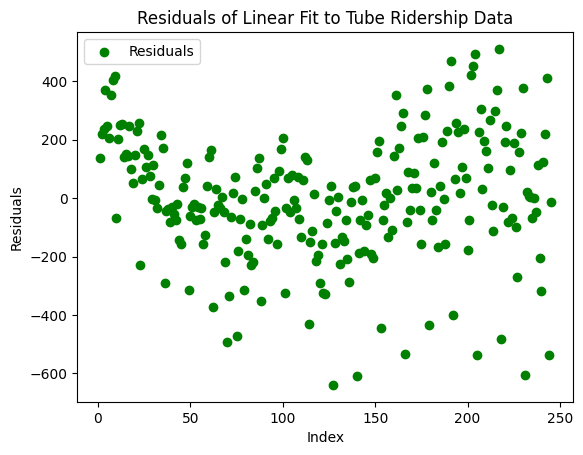

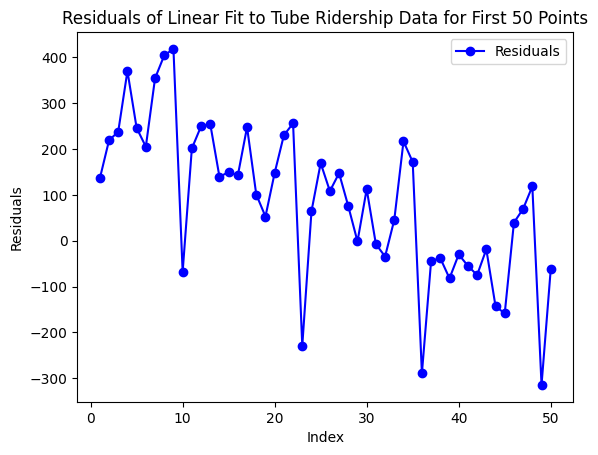

In [136]:
# Your code here

plt.scatter(xvals, fitted[2], color='green', label='Residuals')
plt.title('Residuals of Linear Fit to Tube Ridership Data')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.legend()
plt.show()

plt.plot(xvals[:50], fitted[2][:50], color='blue',marker = 'o', label='Residuals')
plt.title('Residuals of Linear Fit to Tube Ridership Data for First 50 Points')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.legend()
plt.show()


We see a trend of periodic dips at roughly every 10-12 data points

### 3d) Periodogram

- Compute and plot the peridogram of the residuals. (Recall that the periodogram is the squared-magnitude of the DFT coefficients.)
- Identify the indices/frequencies for which the periogram value exceeds **50%** of the maximum. 


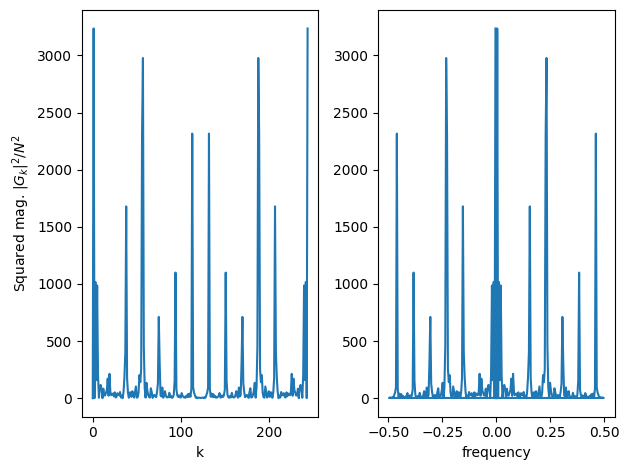

In [137]:
# Your code to compute and plot the periodogram
N = np.size(xvals)
T = 1 # This can be the time interval between any two successive values.

# Note that T is in years

# Compute the squared magnitudes of the DFT coefficients -- this is known as the "periodogram"
pgram = np.abs(np.fft.fft(fitted[2], N)/N)**2 #We normalize by N, but this is optional
indices = np.linspace(0, (N-1), num = N)
freqs_in_hz = np.fft.fftfreq(N)/T
freqs_in_rads = freqs_in_hz*2*math.pi

plt.subplot(121)
plt.plot(indices, pgram)
plt.xlabel('k')
plt.ylabel('Squared mag. $|G_k|^2/N^2$')
plt.subplot(122)
plt.plot(freqs_in_hz, pgram)
plt.xlabel('frequency')
plt.tight_layout()



In [138]:
# Your code to identify the indices for which the periodogram value exceeds 50% of the maximum
max = np.max(pgram)
threshold = 0.5 * max
indices = np.where(pgram > threshold)[0]
print(f"Indices where periodogram exceeds 50% of max: {indices}")
print(f"Frequencies where periodogram exceeds 50% of max: {[float(np.round(freqs_in_rads[index],decimals=3)) for index in indices]}")



Indices where periodogram exceeds 50% of max: [  1  38  56  57 113 132 188 189 207 244]
Frequencies where periodogram exceeds 50% of max: [0.026, 0.975, 1.436, 1.462, 2.898, -2.898, -1.462, -1.436, -0.975, -0.026]


## 3e) To the residuals,  fit a model of the form  

$$ \beta_{1s} \sin(\omega_1 x) + \beta_{1c} \cos(\omega_1 x) + \beta_{2s} \sin(\omega_2 x) + \beta_{2c} \cos(\omega_2 x) + \ldots + \beta_{Ks} \sin(\omega_K x) + \beta_{Kc} \cos(\omega_K x).$$

The frequencies $\omega_1, \ldots, \omega_K$ in the model are those corresponding to the indices identified in Part 2c. (Hint: Each of the sines and cosines will correspond to one column in your X-matrix.)

- Print the values of the regression coefficients obtained using least-squares. 

All numerical outputs should be displayed to three decimal places.

MSE: 20507.702, R^2: 0.548


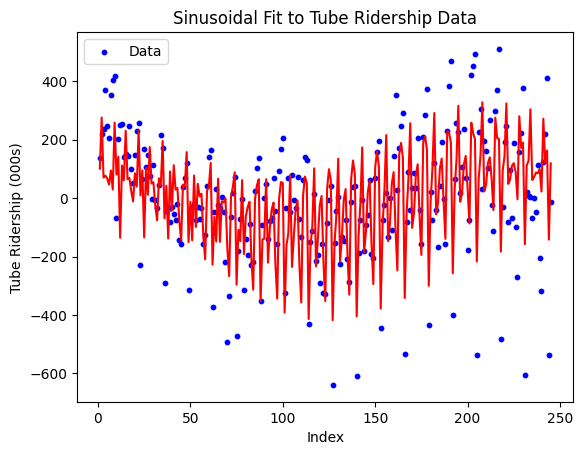

In [139]:
# Your code here
def sinusoidal_fit(x, y, freq):
    X = []
    for f in freq:
        X.append(np.sin(f * x))
        X.append(np.cos(f * x))
    X = np.array(X).T
    coeffs = np.linalg.lstsq(X, y, rcond=None)[0]
    fit = np.dot(X, coeffs)
    resid = y - fit
    MSE = np.round(np.mean((y - fit) ** 2), decimals = 3)
    R_squared = np.round(1 - (np.sum((y - fit) ** 2) / np.sum((y - np.mean(y)) ** 2)), decimals=3)
    print(f"MSE: {MSE}, R^2: {R_squared}")
    plt.plot(x, fit, color='red')
    plt.scatter(x, fitted[2], color='blue', s=10, label='Data')
    plt.title('Sinusoidal Fit to Tube Ridership Data')
    plt.xlabel('Index')
    plt.ylabel('Tube Ridership (000s)')
    plt.legend()
    plt.show()
    return coeffs, fit, resid, MSE, R_squared

sinu = sinusoidal_fit(xvals, fitted[2], [float(np.round(freqs_in_rads[index],decimals=3)) for index in indices])


### 3f) The combined fit
- Plot the combined fit together with a scatterplot of the data
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

The combined fit, which corresponds to the full model

$$
f(x) = \beta_0 + \beta_1 x + \beta_{s1} \sin(\omega_1 x) + \beta_{c1} \cos(\omega_1 x) + \ldots + \beta_{sk} \sin(\omega_k x) + \beta_{ck} \cos(\omega_k x),
$$

can be obtained by adding the fits in parts 2b) and 2e).

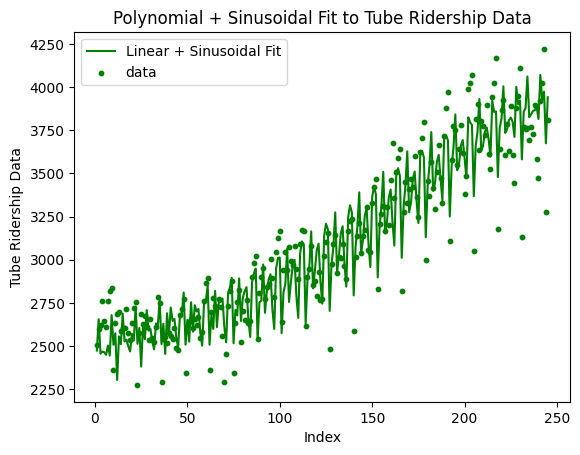

Mean of residuals =  -1.38155 Variance of residuals =  20505.793


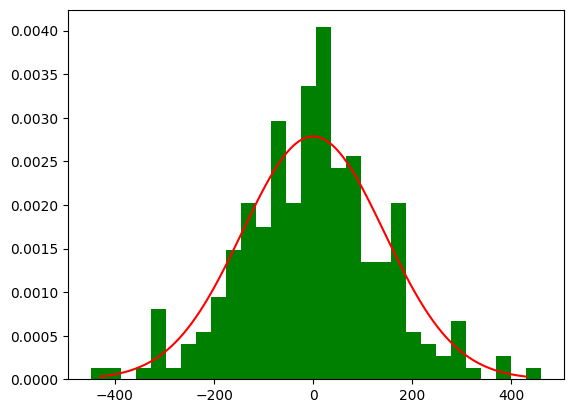

In [140]:
# Your code here
plt.plot(xvals, fitted[1]+sinu[1], color='green', label='Linear + Sinusoidal Fit')
plt.scatter(xvals, yvals, color='green',s=10, label='data')
plt.title('Polynomial + Sinusoidal Fit to Tube Ridership Data')
plt.xlabel('Index')
plt.ylabel('Tube Ridership Data')
plt.legend()
plt.show()

resid_lin = yvals - (fitted[1] + sinu[1])
print('Mean of residuals = ', np.round(np.mean(resid_lin), 5), 'Variance of residuals = ', 
      np.round(np.var(resid_lin), 3))

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(resid_lin, bins=30, density=True, facecolor='green')

# Plot Gaussian pdf with same mean and variance as the residuals
from scipy.stats import norm

res_stdev = np.std(resid_lin)  #standard deviation of residuals
xvals = np.linspace(-3*res_stdev,3*res_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_stdev), 'r')
plt.show()


The addition of sinusoidal functions allow the model to better capture the variation between points, but is still unable to fully reach the values further away from the line of best fit. This may be due to the low-order of polynomial fitting performed, as well as the 50% threshold for the frequency components. The overall model however is shown to have a close fit to the data from the residuals-against-gaussian plot.